In [1]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns#visualization
from sklearn.model_selection import train_test_split, StratifiedKFold,GridSearchCV
from tqdm import tqdm_notebook
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score


In [2]:
#Importing dataset
df=pd.read_csv("Breast Cancer Data.csv")

In [3]:
#View the dataset
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
#removing the id column
df=df.drop('id',axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [6]:
print ("Rows :" ,df.shape[0])
print ("Columns :" ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n",df.nunique())

Rows : 569
Columns : 31

Features : 
 ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

Missing values :   0

Unique values :  
 diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se           

In [7]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [8]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

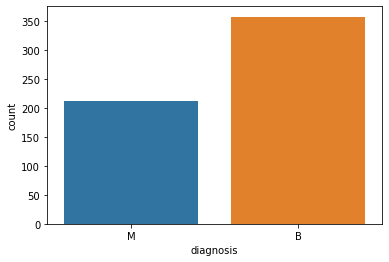

In [9]:
#countplot using seaborn
sns.countplot(x='diagnosis', data=df)

In [10]:
#Replace the diagnosis column 
d = {'B' : False, 'M' : True}
df['diagnosis'] = df['diagnosis'].map(d)

In [11]:
df['diagnosis'].unique()

array([ True, False])

In [12]:
# Convert the Diagnosis column to int()
df['diagnosis']=df['diagnosis'].astype('int64')

In [13]:
df['diagnosis'].value_counts(normalize=True)

0    0.627417
1    0.372583
Name: diagnosis, dtype: float64

In [14]:
#Normalised values
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


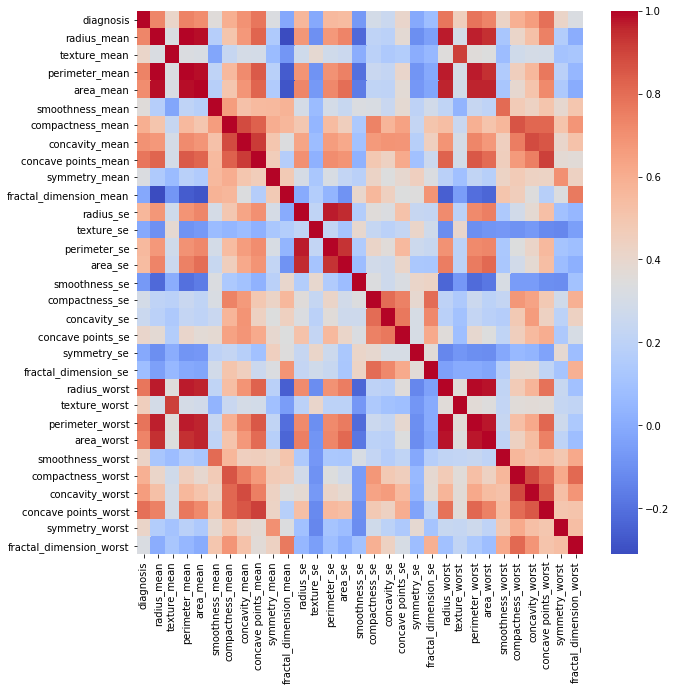

In [15]:
#Correlation plot 
corr=df.corr()
plt.figure( figsize=(10, 10))
sns.heatmap(corr,cmap='coolwarm')

In [16]:
# removing features that are less correlated with our target variable
df.corr().diagnosis[df.corr().diagnosis<=0.2]

fractal_dimension_mean   -0.012838
texture_se               -0.008303
smoothness_se            -0.067016
symmetry_se              -0.006522
fractal_dimension_se      0.077972
Name: diagnosis, dtype: float64

In [17]:
less_corr = df.corr().diagnosis[df.corr().diagnosis<=0.2].index

In [18]:
df = df.drop(less_corr,axis=1)

In [19]:
df.shape

(569, 26)

In [20]:
#Input and output variables
X,y =df.drop('diagnosis',axis=1),df['diagnosis']

In [21]:
X.shape,y.shape

((569, 25), (569,))

In [22]:
#Split the data into 70-30 train test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=17)

In [23]:
X_train.shape, X_test.shape

((398, 25), (171, 25))

In [24]:
tree = DecisionTreeClassifier(random_state=17)

In [25]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=17, splitter='best')

In [26]:
#Cross Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

In [27]:
cv_accuracies_by_depth, test_accuracies_by_depth = [], []

max_depth_values = np.arange(2, 11)

# for each value of max depth 
for curr_max_depth in tqdm_notebook(max_depth_values):
    tree = DecisionTreeClassifier(random_state=17, max_depth=curr_max_depth)

    # perform cross-validation
    val_scores = cross_val_score(estimator=tree, X=X_train, y=y_train, cv=skf)
    cv_accuracies_by_depth.append(val_scores.mean())
    
    # assess the model with the test set
    tree.fit(X_train, y_train)
    
    curr_test_pred = tree.predict(X_test)
    
    test_accuracies_by_depth.append(accuracy_score(y_test, curr_test_pred))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


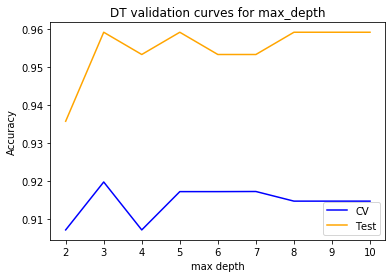

In [28]:
plt.plot(max_depth_values, cv_accuracies_by_depth, label='CV', c='blue')
plt.plot(max_depth_values, test_accuracies_by_depth, label='Test', c='orange')
plt.legend();
plt.xlabel('max depth')
plt.ylabel('Accuracy')
plt.title('DT validation curves for max_depth');

In [29]:
pred_test = tree.predict(X_test)

In [30]:
pred_test.shape, y_test.shape

((171,), (171,))

In [31]:
accuracy_score(y_test, pred_test)

0.9590643274853801

In [32]:
y.value_counts(normalize=True)

0    0.627417
1    0.372583
Name: diagnosis, dtype: float64

In [33]:
#GridSearchCV
params = {'max_depth': np.arange(2, 11), 'min_samples_leaf':  np.arange(1, 11)}

In [34]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

In [35]:
best_tree = GridSearchCV(estimator=tree, param_grid=params, cv=skf, n_jobs=-1,
                        verbose=1)

In [36]:
best_tree.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:    3.7s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=True),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=10,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=17,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             p

In [37]:
best_tree.best_params_

{'max_depth': 3, 'min_samples_leaf': 3}

In [38]:
best_tree.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=17, splitter='best')

In [39]:
#Cross-Validation assessment of model quality

In [40]:
best_tree.best_score_

0.922246835443038

In [41]:
#Test assessment
pred_test_better = best_tree.predict(X_test)

In [42]:
accuracy_score(y_test, pred_test_better)

0.9473684210526315

In [57]:
export_graphviz(decision_tree=best_tree.best_estimator_,
               out_file='tree.dot', filled=True, 
                feature_names=df.drop('diagnosis', axis=1).columns)